--------- KÜTÜPHANELERİN EKLENMESİ ---------

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

--------- GÖRÜNTÜ OKUMA ve BOYUTLANDIRMA ---------

Text(0.5, 1.0, 'Girdi')

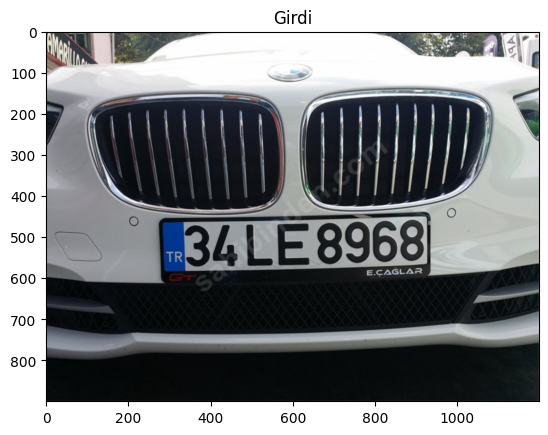

In [ ]:
img = cv2.imread("/Users/mehmetozcelik/Desktop/PlateRecognition/data/3.jpg")  # araç görüntüsü path'i

new_width = 1200
scale_percent = new_width / img.shape[1] * 100

new_height = int(img.shape[0] * scale_percent / 100)
img = cv2.resize(img, (new_width, new_height))
original = img.copy()
plt.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
plt.title("Girdi")

--------- GRİYE ÇEVİRME ---------

Text(0.5, 1.0, 'Grayscale')

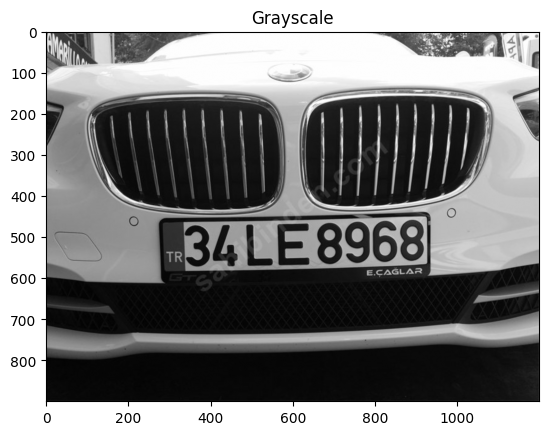

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")

--------- GÜRÜLTÜ AZALTMA ---------

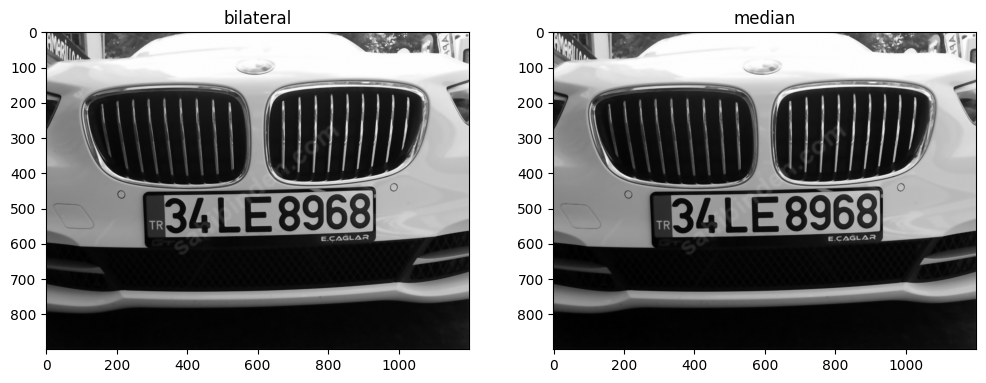

In [20]:
bilateral = cv2.bilateralFilter(gray, 9, 23, 23)
median = cv2.medianBlur(bilateral, 3)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("bilateral")
plt.imshow(bilateral, cmap="gray")

plt.subplot(122)
plt.title("median")
plt.imshow(median, cmap="gray")

--------- OTSU THRESHOLD İLE CANNY EŞİKLERİ BELİRLEME ---------

In [21]:
canny_low = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]
canny_high = 3 * canny_low

--------- KENAR BULMA ---------

Text(0.5, 1.0, 'Canny ile Kenar Bulma')

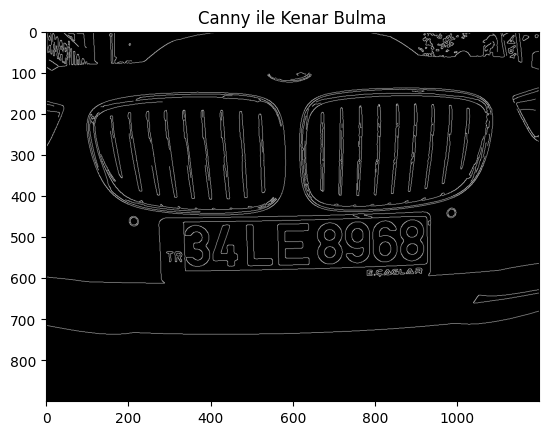

In [22]:
canny = cv2.Canny(median, canny_low, canny_high)
plt.imshow(canny, cmap="gray")
plt.title("Canny ile Kenar Bulma")

--------- MORFOLOJİK TEMİZLİK ---------

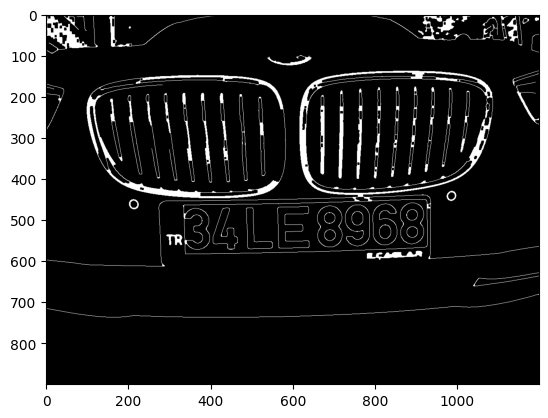

In [23]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(morph, cmap="gray")

--------- KONTUR BULMA ---------

In [24]:
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

--------- EN BÜYÜK UYGUN KONTURU BULMA ---------

In [25]:
plate_candidate = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:  # çok küçükse geç
        continue

    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h if h != 0 else 0

    if 2 < aspect_ratio < 6 and w > 60 and h > 15:  # plaka oranı ve boyutu
        roi = gray[y:y+h, x:x+w]
        roi_mean = np.mean(roi)
        roi_std = np.std(roi)

        if 80 < roi_mean < 200 and roi_std > 10:  # yazı ihtimali yüksek
            plate_candidate = (x, y, w, h)
            break


--------- GÖRSELLEŞTİRME ---------

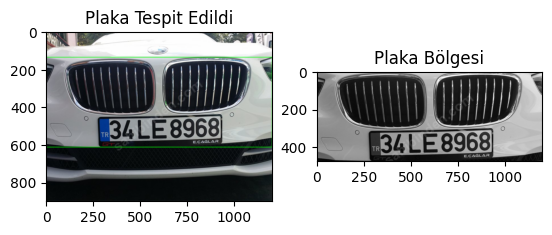

In [26]:
if plate_candidate:
    x, y, w, h = plate_candidate
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    crop = gray[y:y+h, x:x+w]
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Plaka Tespit Edildi")
    plt.subplot(1,2,2)
    plt.imshow(crop, cmap="gray")
    plt.title("Plaka Bölgesi")
    plt.show()

    cv2.imwrite("/Users/mehmetozcelik/Desktop/PlateRecognition/outputs/output1.png", crop, [cv2.IMWRITE_PNG_COMPRESSION, 9]) # Kaydet
else:
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Plaka Bulunamadi")
    plt.show()